This notebook demonstrates the class distribution of the utilized Fake/True News datasets

In [1]:
import os
import glob
import pandas
import matplotlib.pyplot as plt
import numpy as np
from transformers import squad_convert_examples_to_features
from common import *
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import IncrementalPCA, PCA

/home/justus/MA-540-TEAM3/venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2022-04-21 11:50:03.883820: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ros/noetic/lib
2022-04-21 11:50:03.883841: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
SAMPLE_SIZE = 3000
COMPONENTS = 2

Preprocess Data

In [3]:
if os.path.exists('True.csv') and os.path.exists('Fake.csv'):
    files = glob.glob('*.csv')
else:
    files = download_data()

frames = {}
for file in files:
    frames[file] = pandas.read_csv(file, usecols=['text'])
    if file == 'True.csv':
        frames[file]['label'] = np.ones(frames[file].size)
    else:
        frames[file]['label'] = np.zeros(frames[file].size)

dataset = pandas.concat(frames.values())

PCA: Plot for TF-IDF and BoW vectorizer

In [4]:
tfidf_vectorizer = TfidfVectorizer()
analyzer = PCA(n_components=COMPONENTS)

Iteration: 1
TF-IDF matrix shape: (3000, 40763)
PCA matrix shape: (3000, 2)
Iteration: 2
TF-IDF matrix shape: (3000, 40384)
PCA matrix shape: (3000, 2)
Iteration: 3
TF-IDF matrix shape: (3000, 40451)
PCA matrix shape: (3000, 2)
Iteration: 4
TF-IDF matrix shape: (3000, 40989)
PCA matrix shape: (3000, 2)
Iteration: 5
TF-IDF matrix shape: (3000, 40672)
PCA matrix shape: (3000, 2)
Iteration: 6
TF-IDF matrix shape: (3000, 40859)
PCA matrix shape: (3000, 2)


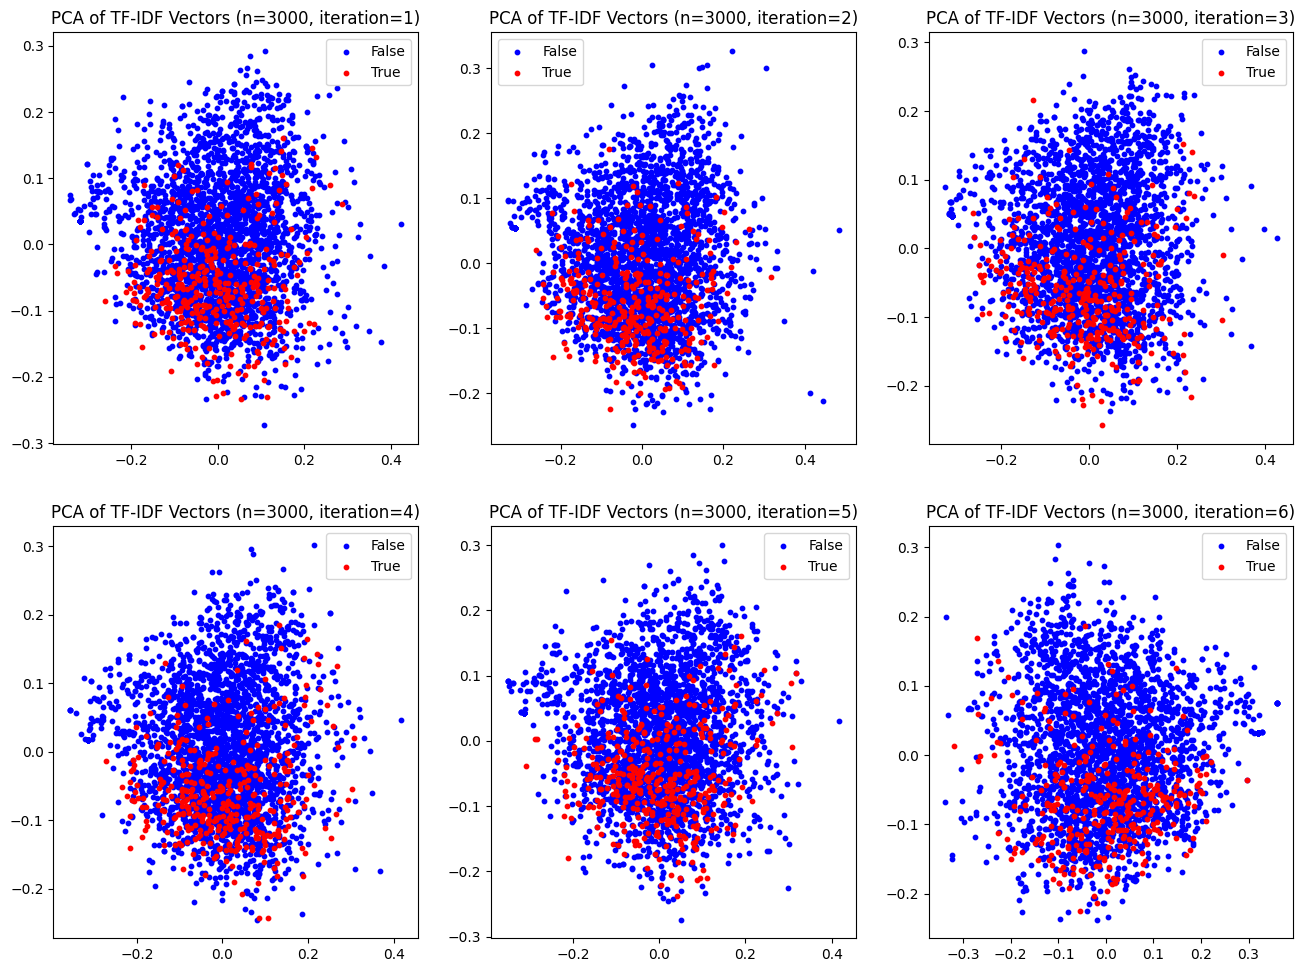

<Figure size 432x288 with 0 Axes>

In [5]:
figure = plt.figure(figsize=(16, 12), dpi=100)
for i in range(6):
    # subset of the larger dataset to perform principle component analysis on
    # (dataset is too large to process all at once)
    subset = dataset.sample(n=SAMPLE_SIZE, random_state=RANDOM_SEED + i)

    # split data and labels into x and y
    x = subset['text'].values
    y = subset['label'].values

    # generate embeddings for TF-IDF
    print(f'Iteration: {i + 1}')
    tfidf_embeddings = tfidf_vectorizer.fit_transform(x).toarray()
    print('TF-IDF matrix shape:', tfidf_embeddings.shape)

    # principle component analysis of the tf-idf matrix/embeddings (keep 2 components and plot)
    tfidf_pca = analyzer.fit_transform(tfidf_embeddings)
    print('PCA matrix shape:', tfidf_pca.shape)

    # plot data for this iteration
    figure.add_subplot(2, 3, i + 1)
    plt.scatter(tfidf_pca[y == 0, 0], tfidf_pca[y == 0, 1], color='b', s=10, label='False')
    plt.scatter(tfidf_pca[y == 1, 0], tfidf_pca[y == 1, 1], color='r', s=10, label='True')
    plt.title(f'PCA of TF-IDF Vectors (n={SAMPLE_SIZE}, iteration={i + 1})')
    plt.legend()

plt.show()
plt.savefig("plt", format="png")


Iteration: 1
BOW matrix shape: (3000, 40763)
PCA matrix shape: (3000, 2)
Iteration: 2
BOW matrix shape: (3000, 40384)
PCA matrix shape: (3000, 2)
Iteration: 3
BOW matrix shape: (3000, 40451)
PCA matrix shape: (3000, 2)
Iteration: 4
BOW matrix shape: (3000, 40989)
PCA matrix shape: (3000, 2)
Iteration: 5
BOW matrix shape: (3000, 40672)
PCA matrix shape: (3000, 2)
Iteration: 6
BOW matrix shape: (3000, 40859)
PCA matrix shape: (3000, 2)


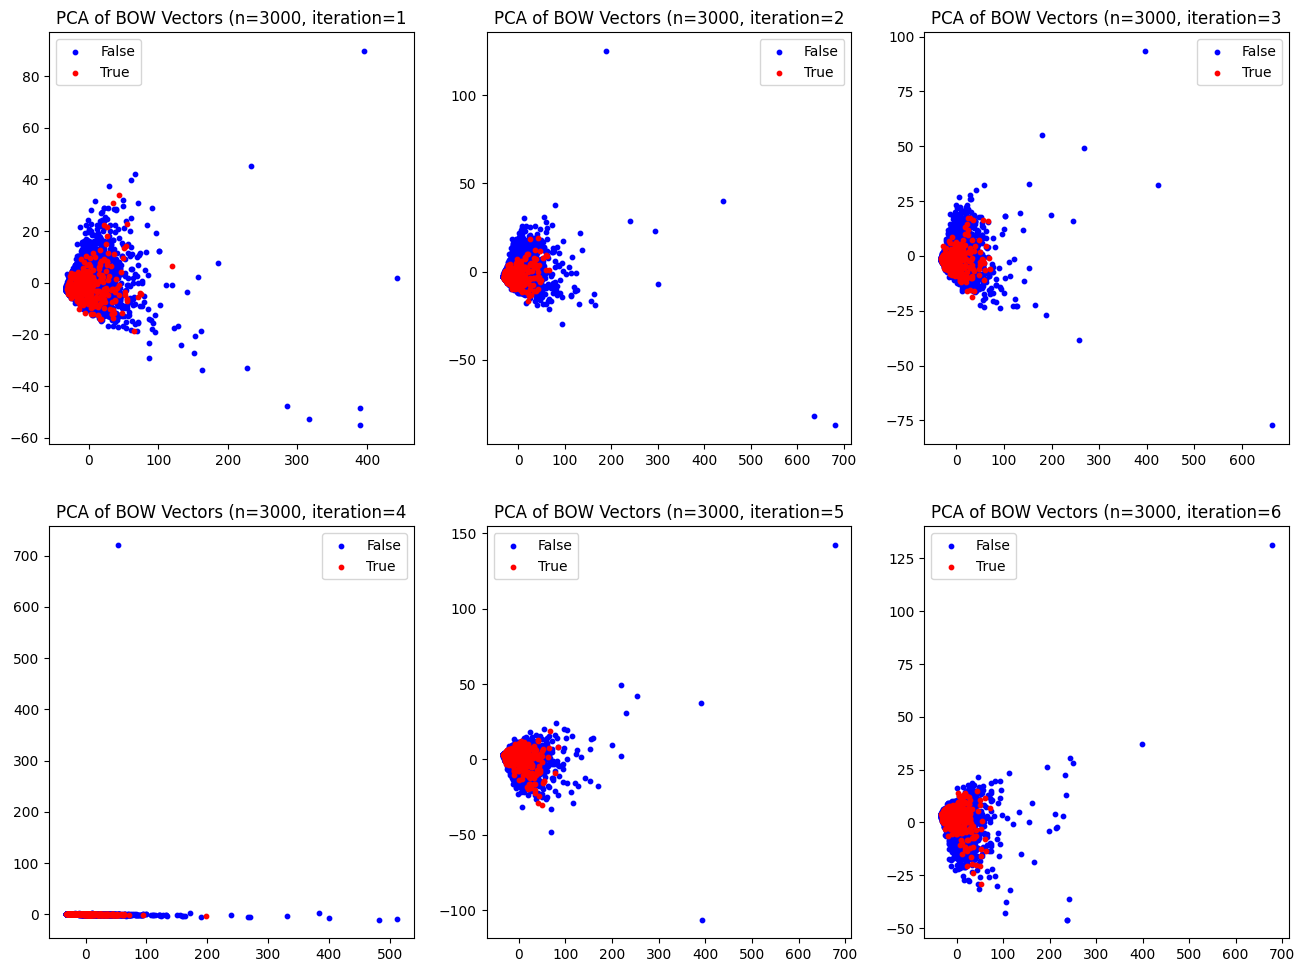

<Figure size 432x288 with 0 Axes>

In [6]:
bow_vectorizer = CountVectorizer()

figure = plt.figure(figsize=(16, 12), dpi=100)
for i in range(6):
    # subset of the larger dataset to perform principle component analysis on
    # (dataset is too large to process all at once)
    subset = dataset.sample(n=SAMPLE_SIZE, random_state=RANDOM_SEED + i)

    # split data and labels into x and y
    x = subset['text'].values
    y = subset['label'].values

    # generate embeddings for BOW
    print(f'Iteration: {i + 1}')
    bow_embeddings = bow_vectorizer.fit_transform(x).toarray()
    print('BOW matrix shape:', bow_embeddings.shape)

    # principle component analysis of the bow matrix/embeddings (keep 2 components and plot)
    bow_pca = analyzer.fit_transform(bow_embeddings)
    print('PCA matrix shape:', bow_pca.shape)

    # plot data for this iteration
    figure.add_subplot(2, 3, i + 1)
    plt.scatter(bow_pca[y == 0, 0], bow_pca[y == 0, 1], color='b', s=10, label='False')
    plt.scatter(bow_pca[y == 1, 0], bow_pca[y == 1, 1], color='r', s=10, label='True')
    plt.title(f'PCA of BOW Vectors (n={SAMPLE_SIZE}, iteration={i + 1}')
    plt.legend()

plt.show()
plt.savefig("incremental_plt.png", format="png")



Incremental PCA: Plot for TF-IDF and BoW vectorizer

In [7]:
tfidf_vectorizer = TfidfVectorizer()
analyzer = IncrementalPCA(n_components=COMPONENTS)

In [8]:
figure = plt.figure(figsize=(16, 12), dpi=100)
for i in range(6):
    # subset of the larger dataset to perform principle component analysis on
    # (dataset is too large to process all at once)
    subset = dataset.sample(n=SAMPLE_SIZE, random_state=RANDOM_SEED + i)

    # split data and labels into x and y
    x = subset['text'].values
    y = subset['label'].values

    # generate embeddings for TF-IDF
    print(f'Iteration: {i + 1}')
    tfidf_embeddings = tfidf_vectorizer.fit_transform(x).toarray()
    print('TF-IDF matrix shape:', tfidf_embeddings.shape)

    # principle component analysis of the tf-idf matrix/embeddings (keep 2 components and plot)
    tfidf_pca = analyzer.fit_transform(tfidf_embeddings)
    print('Inc. PCA matrix shape:', tfidf_pca.shape)

    # plot data for this iteration
    figure.add_subplot(2, 3, i + 1)
    plt.scatter(tfidf_pca[y == 0, 0], tfidf_pca[y == 0, 1], color='b', s=10, label='False')
    plt.scatter(tfidf_pca[y == 1, 0], tfidf_pca[y == 1, 1], color='r', s=10, label='True')
    plt.title(f'Inc. PCA of TF-IDF Vectors (n={SAMPLE_SIZE}, iteration={i + 1})')
    plt.legend()

plt.show()

Iteration: 1
TF-IDF matrix shape: (3000, 40763)


In [ ]:
bow_vectorizer = CountVectorizer()

figure = plt.figure(figsize=(16, 12), dpi=100)
for i in range(6):
    # subset of the larger dataset to perform principle component analysis on
    # (dataset is too large to process all at once)
    subset = dataset.sample(n=SAMPLE_SIZE, random_state=RANDOM_SEED + i)

    # split data and labels into x and y
    x = subset['text'].values
    y = subset['label'].values

    # generate embeddings for BOW
    print(f'Iteration: {i + 1}')
    bow_embeddings = bow_vectorizer.fit_transform(x).toarray()
    print('BOW matrix shape:', bow_embeddings.shape)

    # principle component analysis of the bow matrix/embeddings (keep 2 components and plot)
    bow_pca = analyzer.fit_transform(bow_embeddings)
    print('Inc. PCA matrix shape:', bow_pca.shape)

    # plot data for this iteration
    figure.add_subplot(2, 3, i + 1)
    plt.scatter(bow_pca[y == 0, 0], bow_pca[y == 0, 1], color='b', s=10, label='False')
    plt.scatter(bow_pca[y == 1, 0], bow_pca[y == 1, 1], color='r', s=10, label='True')
    plt.title(f'Inc. PCA of BOW Vectors (n={SAMPLE_SIZE}, iteration={i + 1}')
    plt.legend()

plt.show()
